# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [63]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [62]:
# reading the Excelfile from my storage
employees_data = pd.ExcelFile(r'TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx') 
existing_employees = pd.read_excel(employees_data, 'Existing employees')
employees_that_left = pd.read_excel(employees_data, 'Employees who have left')                         

In [64]:
# getting the first five rows of the first data
existing_employees.head() #This is a supervised learning

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
# getting the first five rows of second data
employees_that_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [65]:
# adding another column to my data "attrition" adding 0 to indicate they are still in the company 
existing_employees['attrition'] = 0 

In [66]:
#checking the first five role of the data
existing_employees.head() 

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [67]:
# adding another column to my data "attrition" adding 1 to indicate they have left the company 
employees_that_left['attrition'] = 1


In [68]:
employees_that_left.head() #checking the first five role of the data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [69]:
# joining both data sets together 
df= pd.concat([existing_employees, employees_that_left]) 

In [70]:
#checking the first five role of the joined data
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [11]:
# checking for missing values
df.isnull().sum() 

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
attrition                0
dtype: int64

In [95]:
# checking the shape of the data
print(f'The shape of the data is {df.shape}')

The shape of the data is (14999, 11)


In [96]:
#checking the info of the data
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.6+ MB


### EDA'S

#### Key points 0 represent people that are still in the company while 1 represents people that have left the company

In [97]:
#checking the number of employee that left to the number that are still in the company
df['attrition'].value_counts(normalize= True) 


0    0.761917
1    0.238083
Name: attrition, dtype: float64

<AxesSubplot:xlabel='attrition', ylabel='count'>

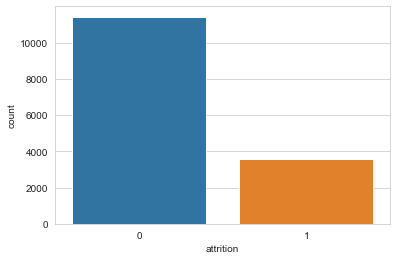

In [98]:
# plot showing the visualization the observation above
sns.countplot(x='attrition', data=df) 

<Figure size 720x576 with 0 Axes>

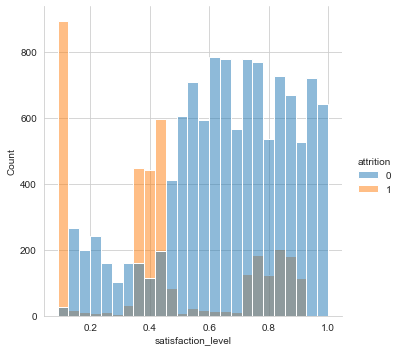

In [99]:
# plot that shows the satisfaction level versus the employee who left
plt.figure(figsize=(10,8))
sns.displot(x='satisfaction_level', hue="attrition", data=df, bins=25)

### My observation  from the plot above the satisfaction level of workers that stayed in the company is higher than those who left i.e employee from 0.2-0.4 satisfaction level would most likely leave the company

<AxesSubplot:xlabel='salary', ylabel='count'>

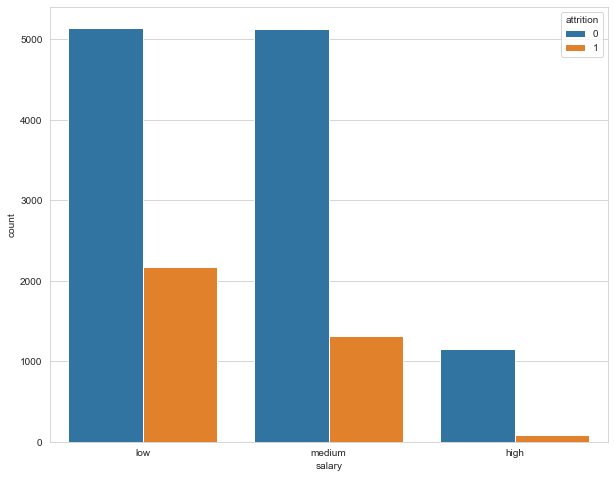

In [17]:
#plot showing the distribution of the salary amongst employees
plt.figure(figsize=(10,8))
sns.countplot(x='salary', hue= "attrition", data=df)

### My observation from the plot above shows that employee who salaries are low or relatively averag are highly likely to leave the company

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

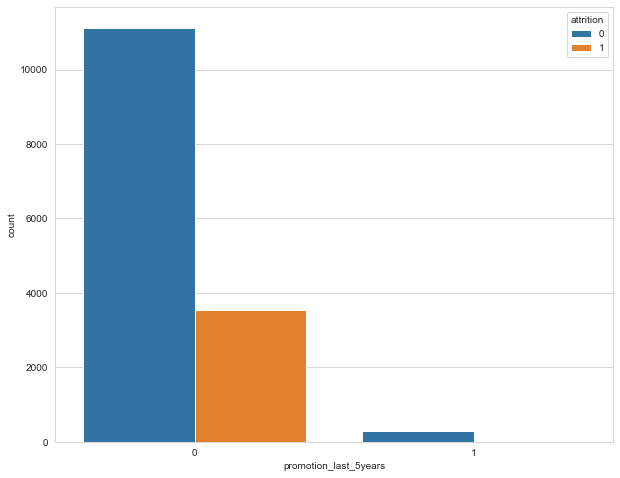

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='promotion_last_5years', hue="attrition", data=df)

### My observation from the plot above shows that employees whom where not promoted in the last five years are more likely to leave the company

<AxesSubplot:xlabel='dept', ylabel='count'>

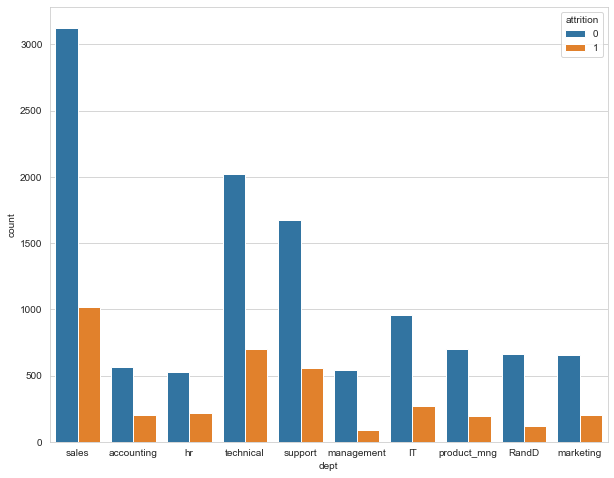

In [20]:
plt.figure(figsize=(10,8)) #plotting a categorical plot of salary to  
sns.countplot(x='dept', hue="attrition",data=df)

### My observation from the plot above is that the department you work in is a factor on whether a company would stay in your company or not, employees who are at sales,technical and support dept are at higher risk of leaving the company

<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

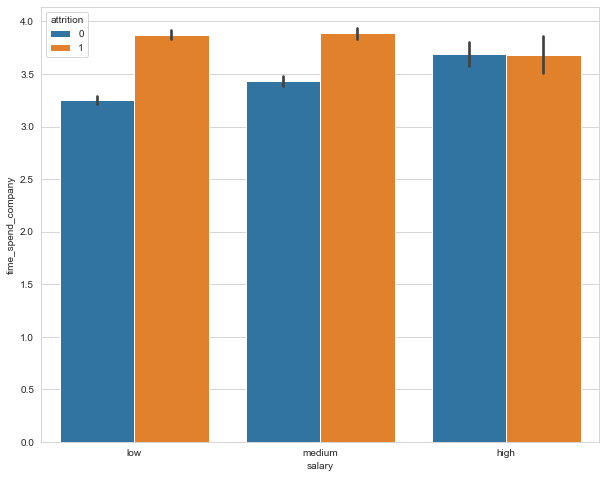

In [131]:
plt.figure(figsize=(10,8)) #plotting a categorical plot of salary to  
sns.barplot(x='salary', y= "time_spend_company", hue="attrition",data=df)

### My observation above is that people who has spent more time with relative low or average salaries are most likely to leave the company

<AxesSubplot:xlabel='promotion_last_5years', ylabel='time_spend_company'>

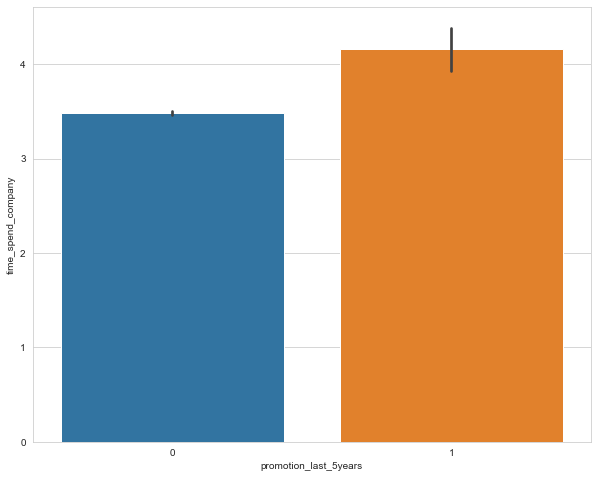

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x="promotion_last_5years", y='time_spend_company',data=df)

### My observations above is that most employees that where promoted in the last five years  tend to stay more in the company as compared to those that where not promoted

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

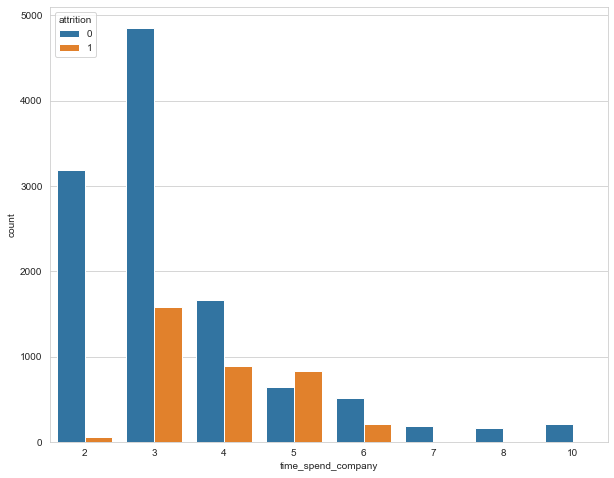

In [74]:
plt.figure(figsize=(10,8)) #plotting a categorical plot of salary to  
sns.countplot(x='time_spend_company', hue='attrition', data=df)

###  My observation from the plot above there was a huge drop from employees in the company from 3- 4 years i think maybe its because there was no clear roadmap for their future in the company and the ones that stayed after 6 years might be because they have a soft spot for the company because longevity normally has that influence

<AxesSubplot:xlabel='number_project', ylabel='count'>

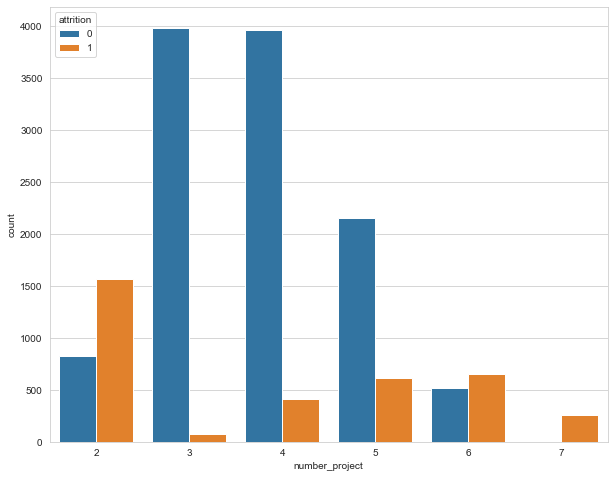

In [128]:
plt.figure(figsize=(10,8)) #plotting a categorical plot of salary to  
sns.countplot(x='number_project', hue="attrition", data=df)

### My observation from the plot above shows that most of the employess that are doing 3-5 projects are most likely to stay as compared to those with less or greater projects maybe because of less engagement or overload

<AxesSubplot:>

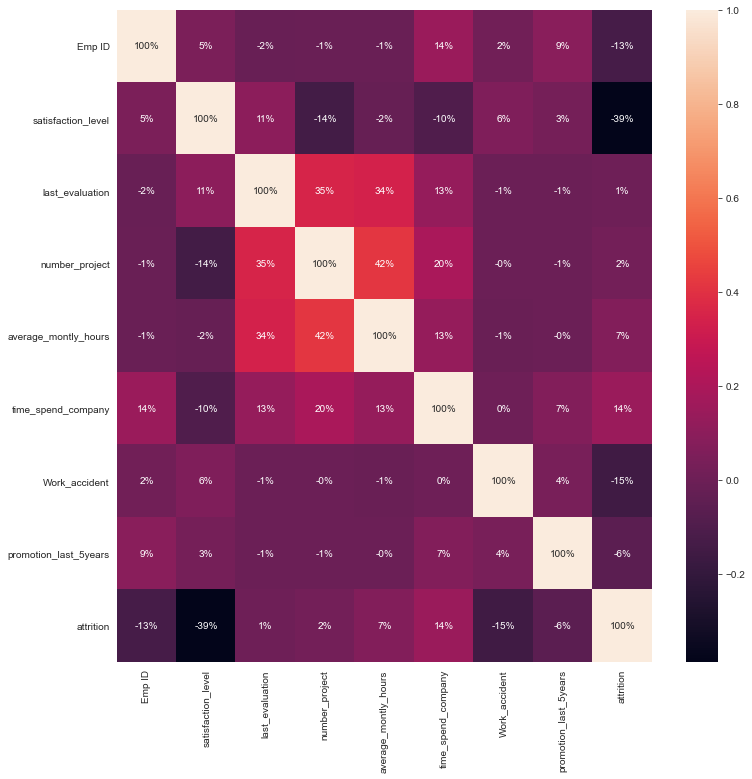

In [75]:
# Map showing the correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [101]:
# assigning the list values of my categorical variable to a variabe col
col = ['salary','dept' ] 


In [102]:
# Transforming my categorical variable to numerical variable  so i would be able to train it in my Model
df_enc=pd.get_dummies(df, columns=col,drop_first= True)

In [103]:
# Checking my Transformed Data
df_enc.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,attrition,salary_low,salary_medium,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## MODEL

In [104]:
#importing libraries for the machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [133]:
X= df_enc.drop(['attrition', 'Emp ID'],axis=1).values # Independent variables
y=df_enc['attrition'].values # Dependent variable/target variable

In [106]:
# To oversample my Unbalanced Data
sm= SMOTE()
X_sample, y_sample = sm.fit_resample(X, y)

In [108]:
#Spliting the dataset into 70% training set and 30% Testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, shuffle=True)

In [109]:
# Creating an object of my random classifier
rf= RandomForestClassifier()

In [110]:
# Training my model using the train set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
# Predicting the response for the dataset
pred= rf.predict(X_test)

In [123]:
print(f"The accuracy of the model is: {accuracy_score(y_test, pred)}");

The accuracy of the model is: 0.9913333333333333


In [124]:
# Evaluating my Model Performance
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3415
           1       0.99      0.97      0.98      1085

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

[[3409    6]
 [  33 1052]]


## Recomendations

* Employees would stay if their satisfaction level improves i.e increase of salary, promotions and more engagements, evaluations e.t.c
* Departments to focus more on are sales,tecnical,support, because that is where the majority of the attrition happened

## Thank you